## LETSGROWMORE INTERNSHIP 
### ADVANCED LEVEL TASK - 3 : Hand_Written_Notes
### Name : Sai Dixith Chetelli

## Task: Develop A Neural Network That Can Read Handwriting:

### Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

#### Dataset link: https://en.wikipedia.org/wiki/MNIST_database
#### Watch Tutorial from here https://youtu.be/CBCfOTePVPo  
 


## Procedure:
#### Step 1: Loading the DataSet
#### Step 2: Preparation of Data
#### Step 3: Modeling
#### Step 4: Model Testing
#### Step 5: Testing Model with User Input
___________

In [1]:
import numpy as np

#for building a model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

# MNIST dataset available in
from keras.datasets import mnist

# For visualizing images
import matplotlib.pyplot as plt

### Step 1: Loading the DataSet

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


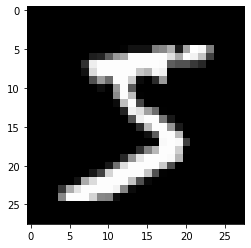

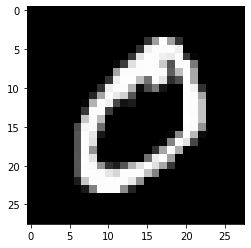

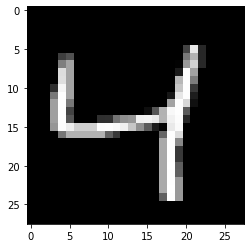

In [4]:
# plot first 3 images
test=x_train[100]
for i in range(3):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

### Step 2: Preparation of Data

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Step 3: Modeling

In [7]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) # Dropout, one form of regularization
model.add (Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add( Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0

In [8]:
#Batch Size of 128
batch_size = 128

#Total Epochs i am considering 5
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 35s 83ms/step - loss: 0.4139 - accuracy: 0.8715 - val_loss: 0.0943 - val_accuracy: 0.9753
Epoch 2/5
422/422 [==============================] - 35s 83ms/step - loss: 0.1360 - accuracy: 0.9581 - val_loss: 0.0645 - val_accuracy: 0.9833
Epoch 3/5
422/422 [==============================] - 35s 83ms/step - loss: 0.1018 - accuracy: 0.9693 - val_loss: 0.0533 - val_accuracy: 0.9863
Epoch 4/5
422/422 [==============================] - 35s 83ms/step - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.0453 - val_accuracy: 0.9872
Epoch 5/5
422/422 [==============================] - 36s 85ms/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.0401 - val_accuracy: 0.9897


### Step 4: Model Testing

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03971287980675697
Test accuracy: 0.9868000149726868


### Step 5: Testing Model with User Input

In [10]:
# Package used for loading images
from keras.preprocessing.image import load_img
# Used to convert image to array
from keras.preprocessing.image import img_to_array

def load_image(imagePath):
    # load the image
    img = load_img(imagePath, grayscale=True, target_size=(28, 28))
    # convert to array
    plt.imshow(img,cmap="gray")
    plt.title("The Actual Image")
    img = img_to_array(img)
    # reshape into a single sample 
    img = img.reshape(1, 28, 28, 1)
    return img

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


E:\program files\anaconda3\envs\tenserfolw\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Predicted Image is  6


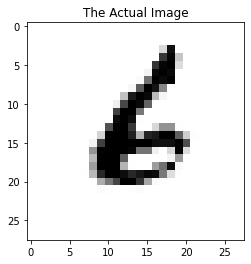

In [11]:
img = load_image('test.png')
digit = model.predict_classes(img)
print("Predicted Image is ",digit[0])

Predicted Image is  0


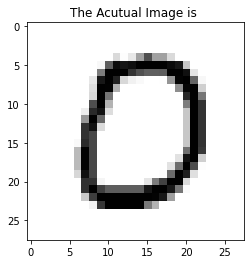

In [12]:
image_index = 10
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("The Acutual Image is ")
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Image is ",pred.argmax())